# imports

In [ ]:
import pandas as pd
import numpy as np
import math

from tqdm import tqdm

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# read & prepare the dataset

In [ ]:
titanic_dataset = pd.read_csv("/content/drive/MyDrive/courses/cs512-machine_learning/Homeworks/Homework2/titanicdata.csv")
titanic_dataset.head()

,Survived,Pclass,Sex,Age
0,0,3,2,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,2,35.0


 ### looking for none values

In [ ]:
titanic_dataset.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

### checking value counts for categorical features & label

In [ ]:
titanic_dataset["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
titanic_dataset["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
titanic_dataset["Sex"].value_counts()

2    577
1    314
Name: Sex, dtype: int64

### checking the statistics of numerical feature _Age_

In [ ]:
titanic_dataset["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

# normalizing

In [ ]:
max(titanic_dataset["Age"])

80.0

* Normally we don't prefer normalizing the categorical features. But since in the question it specificly says to normalize *all* of the features, here I'm normalizing the categorical ones as well.

In [ ]:
titanic_dataset["Age_normalized"] = [(x - min(titanic_dataset["Age"]))/((max(titanic_dataset["Age"]) - min(titanic_dataset["Age"]))) for x in titanic_dataset["Age"]]
titanic_dataset["Sex_normalized"] = [(x - min(titanic_dataset["Sex"]))/((max(titanic_dataset["Sex"]) - min(titanic_dataset["Sex"]))) for x in titanic_dataset["Sex"]] # categorical
titanic_dataset["Pclass_normalized"] = [(x - min(titanic_dataset["Pclass"]))/((max(titanic_dataset["Pclass"]) - min(titanic_dataset["Pclass"]))) for x in titanic_dataset["Pclass"]] # categorical

In [ ]:
titanic_dataset["Pclass_normalized"].value_counts() # categorical

1.0    491
0.0    216
0.5    184
Name: Pclass_normalized, dtype: int64

In [ ]:
titanic_dataset["Sex_normalized"].value_counts() # categorical

1.0    577
0.0    314
Name: Sex_normalized, dtype: int64

In [ ]:
titanic_dataset["Age_normalized"].describe()

count    891.000000
mean       0.367921
std        0.163383
min        0.000000
25%        0.271174
50%        0.367921
75%        0.434531
max        1.000000
Name: Age_normalized, dtype: float64

In [ ]:
titanic_dataset.drop(["Sex", "Age", "Pclass"], inplace=True, axis=1)

# Question 2.1

First implement a function for gradient ascent optimization which takes learning rate as a parameter and then use it to implement your logistic regression classifier.

---


In [ ]:
def sigmoid(x):
  return np.exp(x) / (1 + np.exp(x))


def compute_gradients(X, y, w_0, weights):
  sample_cou, feature_cou = X.shape
  d_w = np.zeros(feature_cou) # initializing the derivative of weights
  d_w_0 = 0 # initializing the derivative of bias (w0)

  for i in range(sample_cou):
    d_w_0 += y[i] - sigmoid(w_0 + np.dot(weights, X[i])) # partial derivative of the objective function with respect to w0

    for j in range(feature_cou):
      d_w[j] += X[i][j] * (y[i] - sigmoid(w_0 + np.dot(weights, X[i]))) # partial derivative of the objective function with respect to arbitrary wj

  return d_w_0, d_w


def gradient_ascent(X, y, learning_rate, iterations):
  weights = np.zeros(X.shape[1]) # initializing weights with an array of zeros
  w_0 = 0 # initializing bias

  weights_log = []

  for it in range(iterations):
    gradient_w0, gradient_weights = compute_gradients(X, y, w_0, weights) # calculating the gradients

    weights += learning_rate * gradient_weights # updating the weights
    weights_log.append(weights) # logging weights to see the change

    w_0 += learning_rate * gradient_w0 # updating the bias

  return weights, w_0, weights_log

In [ ]:
  X = titanic_dataset.drop("Survived", axis=1).to_numpy() # converting features to an array
  y = titanic_dataset["Survived"].to_numpy() # converting labels to an array

In [ ]:
X[:5]

array([[0.27117366, 1.        , 1.        ],
       [0.4722292 , 0.        , 0.        ],
       [0.32143755, 0.        , 1.        ],
       [0.43453129, 0.        , 0.        ],
       [0.43453129, 1.        , 1.        ]])

In [ ]:
y[:5]

array([0, 1, 1, 1, 0])

## let's test our algorithm

In [ ]:
weights, w_0, weights_log = gradient_ascent(X, y, 0.01, iterations=100)

In [ ]:
weights

array([-2.94280645, -3.70672156, -3.18530774])

In [ ]:
w_0

3.4126421494624744

In [ ]:
weights_log

[array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645, -3.70672156, -3.18530774]),
 array([-2.94280645,

# Question 2.2

Split the data into three random sets, 60% as train, 20% validation and 20% as test. Tune hyper-parameters (number of iterations and learning rate) using validation set accuracy. Report which values you tested for learning rate and the maximum number of iterations you used when tuning the model. Retrain your model combining train+val data with using the hyperparameters you have chosen and report the test set performance.

---

## splitting the data into `train` - `test` - `val` sets

* After the diviiding the train set, we can directly divide the rest of the data into two to create test and validation set, because the division ratios are equal for test and validation sets.

In [ ]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=val_ratio+test_ratio, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42, stratify=y_test_val)

## defining a test function to test the model

In [ ]:
def test(X, w_0, weights):

  sample_cou = X.shape[0]
  y_pred = [sigmoid(w_0 + np.dot(weights, X[i])) for i in range(sample_cou)]
  y_pred = [1 if i>=0.5 else 0 for i in y_pred]

  return y_pred

## defining hyperparameters to search

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.5, 0.05, 0.005]
iterations = [10, 50, 100, 200, 500, 1000, 1500]

## hyperparameter tuning

In [ ]:
logs = []

for lr in learning_rates:
  for it in iterations:
    weights, w_0, _ = gradient_ascent(X_train, y_train, lr, it)
    y_pred = test(X_val, w_0, weights)

    logs.append({"weights": weights,
                 "bias": w_0,
                 "learning_rate": lr,
                 "iteration": it,
                 "accuracy": accuracy_score(y_val, y_pred)})
    print(logs[-1])

{'weights': array([ 1.51759425, -8.2373959 , -1.88568392]), 'bias': 19.21613334849684, 'learning_rate': 0.1, 'iteration': 10, 'accuracy': 0.3854748603351955}
{'weights': array([-19.98333898, -30.14380761, -28.82627014]), 'bias': 5.3106569785859215, 'learning_rate': 0.1, 'iteration': 50, 'accuracy': 0.6312849162011173}
{'weights': array([-18.5553934 , -17.70246078, -13.31530908]), 'bias': 22.357673650597743, 'learning_rate': 0.1, 'iteration': 100, 'accuracy': 0.7932960893854749}
{'weights': array([-21.96723941, -12.47952853, -15.04370952]), 'bias': 29.11020793150427, 'learning_rate': 0.1, 'iteration': 200, 'accuracy': 0.6983240223463687}
{'weights': array([-32.40618455, -34.63755798, -32.34352618]), 'bias': 2.6778909843892897, 'learning_rate': 0.1, 'iteration': 500, 'accuracy': 0.6089385474860335}
{'weights': array([-24.21742215, -16.21634743, -18.50847822]), 'bias': 25.692189412004627, 'learning_rate': 0.1, 'iteration': 1000, 'accuracy': 0.7821229050279329}
{'weights': array([-25.14063

## best hyperparameters

In [ ]:
arg = np.argmax([i["accuracy"] for i in logs])
logs[arg]

{'weights': array([-2.29849544, -2.50677224, -2.13805426]),
 'bias': 3.2341262859402917,
 'learning_rate': 0.01,
 'iteration': 100,
 'accuracy': 0.7988826815642458}

## training the model with `train + val` set and testing on `test` set

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       110
           1       0.71      0.82      0.76        68

    accuracy                           0.80       178
   macro avg       0.79      0.81      0.80       178
weighted avg       0.81      0.80      0.81       178



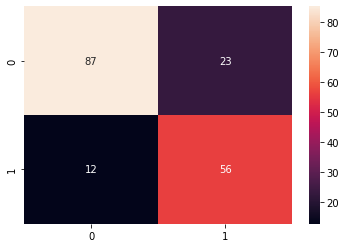

In [ ]:
weights, w_0, _ = gradient_ascent(np.concatenate((X_train, X_val), axis=0), \
                                  np.concatenate((y_train, y_val), axis=0), \
                                  logs[arg]["learning_rate"], \
                                  logs[arg]["iteration"])

y_pred = test(X_test, w_0, weights)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, robust=True, fmt='g')